# Comments and  goals:
* 500 Cities data will not be part of final project (data from all over US, cities only - limited), but may be useful to predict which variables correlate with opioid overdose/may be predictive of opioid overdose
* Will do some limited EDA and analysis, will keep to only one notebook

### Notebook outputs: 
* data/tidy_data/500_cities_totpop_metric_pivot_table.csv
* figures/tidy_figures/500_cities_opioid_corr.png
* products/notebook_1_city_health_dash_500_cities_opioid_corr.pdf - pdf download of notebook

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Pull in raw 500 cities dashboard data

In [2]:
city_raw = pd.read_csv("../../../data/raw_data/500_cities_data/CHDB_data_city_all v7_0.csv")

C:\Users\Dasha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
city_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60500 entries, 0 to 60499
Data columns (total 22 columns):
state_abbr                          60500 non-null object
state_fips                          60500 non-null int64
place_fips                          60500 non-null int64
stpl_fips                           60500 non-null int64
city_name                           60500 non-null object
metric_name                         60500 non-null object
group_name                          60500 non-null object
metric_number                       60500 non-null int64
group_number                        60500 non-null int64
num                                 59421 non-null float64
denom                               59421 non-null float64
est                                 54485 non-null float64
lci                                 54060 non-null float64
uci                                 54060 non-null float64
county_indicator                    55185 non-null float64
educ_indicator      

In [4]:
city = city_raw.copy()

In [5]:
city.drop(['Date of export to MySQL database', 'version', 'NOTE - NCHS Disclaimer'], axis=1, inplace=True)

In [6]:
city.head()

,state_abbr,state_fips,place_fips,stpl_fips,city_name,metric_name,group_name,metric_number,group_number,num,denom,est,lci,uci,county_indicator,educ_indicator,multiplier_indicator,data_yr_type,geo_level
0,HI,15,3,15003,Honolulu,Absenteeism,total population,1,1,9625.0,59827.0,16.1,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016,city
1,AL,1,7000,107000,Birmingham,Absenteeism,total population,1,1,2250.0,10415.0,21.6,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016,city
2,AL,1,35896,135896,Hoover,Absenteeism,total population,1,1,1517.0,14571.0,10.4,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016,city
3,AL,1,37000,137000,Huntsville,Absenteeism,total population,1,1,2376.0,9369.0,25.4,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016,city
4,AL,1,50000,150000,Mobile,Absenteeism,total population,1,1,2826.0,15034.0,18.8,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016,city


In [7]:
city.drop(['geo_level', 'state_fips', 'place_fips', 'stpl_fips'], axis=1, inplace=True)

In [8]:
city.head()

,state_abbr,city_name,metric_name,group_name,metric_number,group_number,num,denom,est,lci,uci,county_indicator,educ_indicator,multiplier_indicator,data_yr_type
0,HI,Honolulu,Absenteeism,total population,1,1,9625.0,59827.0,16.1,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016
1,AL,Birmingham,Absenteeism,total population,1,1,2250.0,10415.0,21.6,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016
2,AL,Hoover,Absenteeism,total population,1,1,1517.0,14571.0,10.4,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016
3,AL,Huntsville,Absenteeism,total population,1,1,2376.0,9369.0,25.4,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016
4,AL,Mobile,Absenteeism,total population,1,1,2826.0,15034.0,18.8,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016


In [9]:
# demographic groups:
set(city['group_name'])

{'age 0-18',
 'age 19-25',
 'age 26-34',
 'age 35-44',
 'age 45-64',
 'asian',
 'black',
 'female',
 'hispanic',
 'limited english proficiency',
 'male',
 'other',
 'total population',
 'white'}

In [10]:
# metrics measured 
set(city['metric_name'])

{'Absenteeism',
 'Air pollution - particulate matter',
 'Binge drinking',
 'Breast cancer deaths',
 'Cardiovascular disease deaths',
 'Children in Poverty',
 'Colorectal cancer deaths',
 'Dental care',
 'Diabetes',
 'Frequent mental distress',
 'Frequent physical distress',
 'High blood pressure',
 'High school graduation',
 'Housing cost, excessive',
 'Housing with potential lead risk',
 'Income Inequality',
 'Lead exposure risk index',
 'Life expectancy',
 'Limited access to healthy foods',
 'Low birthweight',
 'Neighborhood racial/ethnic segregation',
 'Obesity',
 'Opioid overdose deaths',
 'Park access',
 'Physical inactivity',
 'Premature deaths (all causes)',
 'Prenatal care',
 'Preventive services',
 'Racial/ethnic diversity',
 'Smoking',
 'Teen births',
 'Third-grade reading proficiency',
 'Unemployment',
 'Uninsured',
 'Violent crime',
 'Walkability'}

In [11]:
# which deomographic groups is opioid overdose info available for?
city[city['metric_name'] == 'Opioid overdose deaths'].groupby('group_name').count()

,state_abbr,city_name,metric_name,metric_number,group_number,num,denom,est,lci,uci,county_indicator,educ_indicator,multiplier_indicator,data_yr_type
group_name,,,,,,,,,,,,,,
total population,500,500,500,500,500,500,500,428,428,428,428,500,428,500


In [12]:
opioid_overdose = city[city['metric_name'] == 'Opioid overdose deaths'].copy()
opioid_overdose.head()

,state_abbr,city_name,metric_name,group_name,metric_number,group_number,num,denom,est,lci,uci,county_indicator,educ_indicator,multiplier_indicator,data_yr_type
49000,HI,Honolulu,Opioid overdose deaths,total population,32,1,-999.0,-999.0,4.3,3.6,4.9,2.0,-999.0,3.0,2015-2017
49001,AL,Birmingham,Opioid overdose deaths,total population,32,1,-999.0,-999.0,28.0,24.6,31.5,0.0,-999.0,3.0,2015-2017
49002,AL,Hoover,Opioid overdose deaths,total population,32,1,-999.0,-999.0,12.0,8.2,15.9,0.0,-999.0,3.0,2015-2017
49003,AL,Huntsville,Opioid overdose deaths,total population,32,1,-999.0,-999.0,3.5,2.2,4.8,0.0,-999.0,3.0,2015-2017
49004,AL,Mobile,Opioid overdose deaths,total population,32,1,-999.0,-999.0,5.1,3.5,6.7,0.0,-999.0,3.0,2015-2017


In [13]:
print(set(opioid_overdose['group_name']))
print(set(opioid_overdose['group_number']))

{'total population'}
{1}


In [14]:
city_totpop = city[city['group_name'] == 'total population'].copy()
city_totpop.head()

,state_abbr,city_name,metric_name,group_name,metric_number,group_number,num,denom,est,lci,uci,county_indicator,educ_indicator,multiplier_indicator,data_yr_type
0,HI,Honolulu,Absenteeism,total population,1,1,9625.0,59827.0,16.1,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016
1,AL,Birmingham,Absenteeism,total population,1,1,2250.0,10415.0,21.6,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016
2,AL,Hoover,Absenteeism,total population,1,1,1517.0,14571.0,10.4,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016
3,AL,Huntsville,Absenteeism,total population,1,1,2376.0,9369.0,25.4,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016
4,AL,Mobile,Absenteeism,total population,1,1,2826.0,15034.0,18.8,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016


In [15]:
# what's in some of the columns?
print(set(city_totpop['group_name']))
print(set(city_totpop['group_number']))
print(set(city_totpop['data_yr_type']))

{'total population'}
{1}
{nan, '2010-2015, 6 Year Modeled Estimate', '2016-2017', '2015-2016', '2016, 1 Year Modeled Estimate', '2018', '2017-2018', '2017, 5 Year Estimate', '2015', '2014-2015', '2017', '2015-2017', '2015, 1 Year Modeled Estimate'}


In [16]:
# drop uninformative columns
city_totpop.drop(['group_name', 'group_number'], axis=1, inplace=True)
city_totpop.head()

,state_abbr,city_name,metric_name,metric_number,num,denom,est,lci,uci,county_indicator,educ_indicator,multiplier_indicator,data_yr_type
0,HI,Honolulu,Absenteeism,1,9625.0,59827.0,16.1,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016
1,AL,Birmingham,Absenteeism,1,2250.0,10415.0,21.6,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016
2,AL,Hoover,Absenteeism,1,1517.0,14571.0,10.4,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016
3,AL,Huntsville,Absenteeism,1,2376.0,9369.0,25.4,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016
4,AL,Mobile,Absenteeism,1,2826.0,15034.0,18.8,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016


In [17]:
city_totpop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18000 entries, 0 to 60499
Data columns (total 13 columns):
state_abbr              18000 non-null object
city_name               18000 non-null object
metric_name             18000 non-null object
metric_number           18000 non-null int64
num                     17893 non-null float64
denom                   17893 non-null float64
est                     17128 non-null float64
lci                     17078 non-null float64
uci                     17078 non-null float64
county_indicator        17161 non-null float64
educ_indicator          17977 non-null float64
multiplier_indicator    17193 non-null float64
data_yr_type            17978 non-null object
dtypes: float64(8), int64(1), object(4)
memory usage: 1.9+ MB


In [18]:
city_totpop.describe()

,metric_number,num,denom,est,lci,uci,county_indicator,educ_indicator,multiplier_indicator
count,18000.000000,1.789300e+04,1.789300e+04,17128.000000,17078.000000,17078.000000,17161.000000,17977.000000,17193.000000
mean,18.972222,5.669836e+03,2.378344e+04,264.294021,16.246498,33.989173,-145.528815,-944.650387,-812.913453
std,10.823337,4.184871e+04,1.535921e+05,1345.134173,1417.441817,1493.391737,352.443690,226.717857,389.665688
min,1.000000,-9.990000e+02,-9.990000e+02,-45.900000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,9.750000,-9.990000e+02,-9.990000e+02,11.900000,3.900000,5.900000,0.000000,-999.000000,-999.000000
50%,18.500000,-9.990000e+02,-9.990000e+02,24.300000,16.050000,18.700000,0.000000,-999.000000,-999.000000
75%,28.250000,-9.990000e+02,-9.990000e+02,57.500000,39.600000,42.700000,0.000000,-999.000000,-999.000000
max,37.000000,2.157108e+06,8.461961e+06,18100.000000,17700.000000,18400.000000,2.000000,2.000000,3.000000


In [19]:
city_totpop_metric = city_totpop[['state_abbr', 'city_name', 'metric_name', 'est']].copy()
city_totpop_metric.head()

,state_abbr,city_name,metric_name,est
0,HI,Honolulu,Absenteeism,16.1
1,AL,Birmingham,Absenteeism,21.6
2,AL,Hoover,Absenteeism,10.4
3,AL,Huntsville,Absenteeism,25.4
4,AL,Mobile,Absenteeism,18.8


In [20]:
city_totpop_metric['uniq_name'] = city_totpop_metric['state_abbr'] + '_' + city_totpop_metric['city_name']
city_totpop_metric.drop(['state_abbr', 'city_name'], axis=1, inplace=True)
city_totpop_metric.set_index('uniq_name', inplace=True)
city_totpop_metric.head()

,metric_name,est
uniq_name,,
HI_Honolulu,Absenteeism,16.1
AL_Birmingham,Absenteeism,21.6
AL_Hoover,Absenteeism,10.4
AL_Huntsville,Absenteeism,25.4
AL_Mobile,Absenteeism,18.8


In [21]:
city_totpop_metric['metric_name'] = city_totpop_metric['metric_name'].str.lower().str.replace(' ', "_")

In [22]:
city_metric_pivot = city_totpop_metric.pivot(columns='metric_name', values='est')

In [23]:
city_metric_pivot.head()

metric_name,absenteeism,air_pollution_-_particulate_matter,binge_drinking,breast_cancer_deaths,cardiovascular_disease_deaths,children_in_poverty,colorectal_cancer_deaths,dental_care,diabetes,frequent_mental_distress,...,prenatal_care,preventive_services,racial/ethnic_diversity,smoking,teen_births,third-grade_reading_proficiency,unemployment,uninsured,violent_crime,walkability
uniq_name,,,,,,,,,,,,,,,,,,,,,
AK_Anchorage,25.8,NaN,19.4,17.8,135.2,11.5,13.5,65.2,7.6,11.4,...,77.0,36.5,75.5,18.0,20.8,36.9,5.8,14.4,1190.7,32.0
AL_Birmingham,21.6,11.5,13.2,42.5,293.8,45.4,25.1,52.6,16.7,15.2,...,66.3,29.5,59.8,22.3,49.4,14.6,10.7,15.9,NaN,39.4
AL_Hoover,10.4,11.4,17.8,11.9,81.9,8.0,4.1,74.5,8.3,10.4,...,NaN,42.5,56.3,14.1,NaN,53.3,4.2,7.4,97.5,22.6
AL_Huntsville,25.4,10.4,14.1,21.2,171.2,28.7,13.9,61.2,12.2,13.3,...,63.3,43.0,61.6,18.5,22.8,36.2,7.3,13.0,934.5,23.4
AL_Mobile,18.8,10.3,14.7,29.4,267.1,34.8,19.8,58.7,15.2,14.7,...,82.1,31.3,59.6,20.2,36.6,26.0,7.9,14.7,949.3,32.6


# Write to tidy_data for potential future use

In [24]:
#city_metric_pivot.to_csv("../../../data/tidy_data/500_cities_totpop_metric_pivot_table.csv")
### optional import:
city_metric_pivot = pd.read_csv("../../../data/tidy_data/500_cities_totpop_metric_pivot_table.csv")

In [25]:
# missing values?
city_metric_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 37 columns):
uniq_name                                 500 non-null object
absenteeism                               500 non-null float64
air_pollution_-_particulate_matter        498 non-null float64
binge_drinking                            500 non-null float64
breast_cancer_deaths                      492 non-null float64
cardiovascular_disease_deaths             494 non-null float64
children_in_poverty                       500 non-null float64
colorectal_cancer_deaths                  492 non-null float64
dental_care                               500 non-null float64
diabetes                                  500 non-null float64
frequent_mental_distress                  500 non-null float64
frequent_physical_distress                500 non-null float64
high_blood_pressure                       500 non-null float64
high_school_graduation                    478 non-null float64
housing_cost,_

In [26]:
# low_birthweight, prenatal_care, and teen_births are missing < 200 values - remove columns
city_metric_pivot.drop(['low_birthweight', 'prenatal_care', 'teen_births'], axis=1, inplace=True)

In [27]:
# distributions:
city_metric_pivot.describe()

,absenteeism,air_pollution_-_particulate_matter,binge_drinking,breast_cancer_deaths,cardiovascular_disease_deaths,children_in_poverty,colorectal_cancer_deaths,dental_care,diabetes,frequent_mental_distress,...,physical_inactivity,premature_deaths_(all_causes),preventive_services,racial/ethnic_diversity,smoking,third-grade_reading_proficiency,unemployment,uninsured,violent_crime,walkability
count,500.000000,498.000000,500.000000,492.000000,494.000000,500.000000,492.000000,500.000000,500.000000,500.000000,...,500.000000,495.000000,500.000000,500.000000,500.000000,499.000000,500.000000,500.00000,468.000000,500.000000
mean,18.073200,9.191165,17.656200,24.428049,210.440486,22.625400,16.099187,63.196000,9.997800,12.833200,...,23.992000,7510.505051,32.585800,64.086800,17.394000,46.192585,7.169400,12.86000,513.545940,44.509000
std,9.341169,1.692985,2.684346,6.056955,58.725131,10.899536,4.207326,7.546653,2.397196,2.061543,...,6.468535,2856.353588,4.954973,14.622094,4.098042,17.990903,2.694908,5.69098,366.814577,15.788077
min,0.000000,4.900000,9.100000,11.300000,46.700000,2.400000,4.100000,42.300000,4.200000,7.900000,...,10.100000,100.000000,18.400000,13.700000,8.600000,11.200000,3.000000,2.00000,19.600000,6.500000
25%,11.800000,7.900000,16.000000,20.300000,171.350000,14.375000,13.500000,57.600000,8.275000,11.400000,...,18.800000,5400.000000,29.500000,55.600000,14.300000,31.600000,5.300000,9.00000,242.875000,33.700000
50%,16.250000,9.150000,17.550000,23.700000,202.750000,22.150000,15.700000,63.300000,9.800000,12.900000,...,23.850000,7000.000000,32.450000,66.000000,17.100000,44.200000,6.650000,11.95000,416.900000,41.500000
75%,22.500000,10.300000,19.200000,27.900000,236.825000,29.725000,18.325000,68.700000,11.500000,14.300000,...,28.200000,9300.000000,35.925000,74.925000,20.100000,58.650000,8.425000,15.90000,697.650000,54.350000
max,65.800000,15.700000,27.400000,50.600000,515.200000,60.000000,34.300000,81.800000,21.600000,18.400000,...,46.800000,18100.000000,47.700000,94.300000,29.700000,91.100000,22.200000,35.20000,2044.400000,94.200000


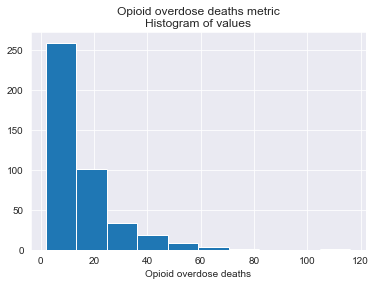

In [28]:
city_metric_pivot['opioid_overdose_deaths'].hist()
plt.xlabel('Opioid overdose deaths')
plt.title('Opioid overdose deaths metric\nHistogram of values')
plt.show()

Opioid data has a non-normal distribution - use spearman correlation

In [29]:
opioid_corr_spear = pd.DataFrame(city_metric_pivot.corr(method='spearman'))['opioid_overdose_deaths'].reset_index()
opioid_corr_spear.columns = ['metric_name', 'opioid_corr_spear']
opioid_corr_spear.head()

,metric_name,opioid_corr_spear
0,absenteeism,0.382007
1,air_pollution_-_particulate_matter,-0.152266
2,binge_drinking,-0.101245
3,breast_cancer_deaths,0.137509
4,cardiovascular_disease_deaths,0.137706


In [30]:
opioid_corr_spear.sort_values('opioid_corr_spear', inplace=True)

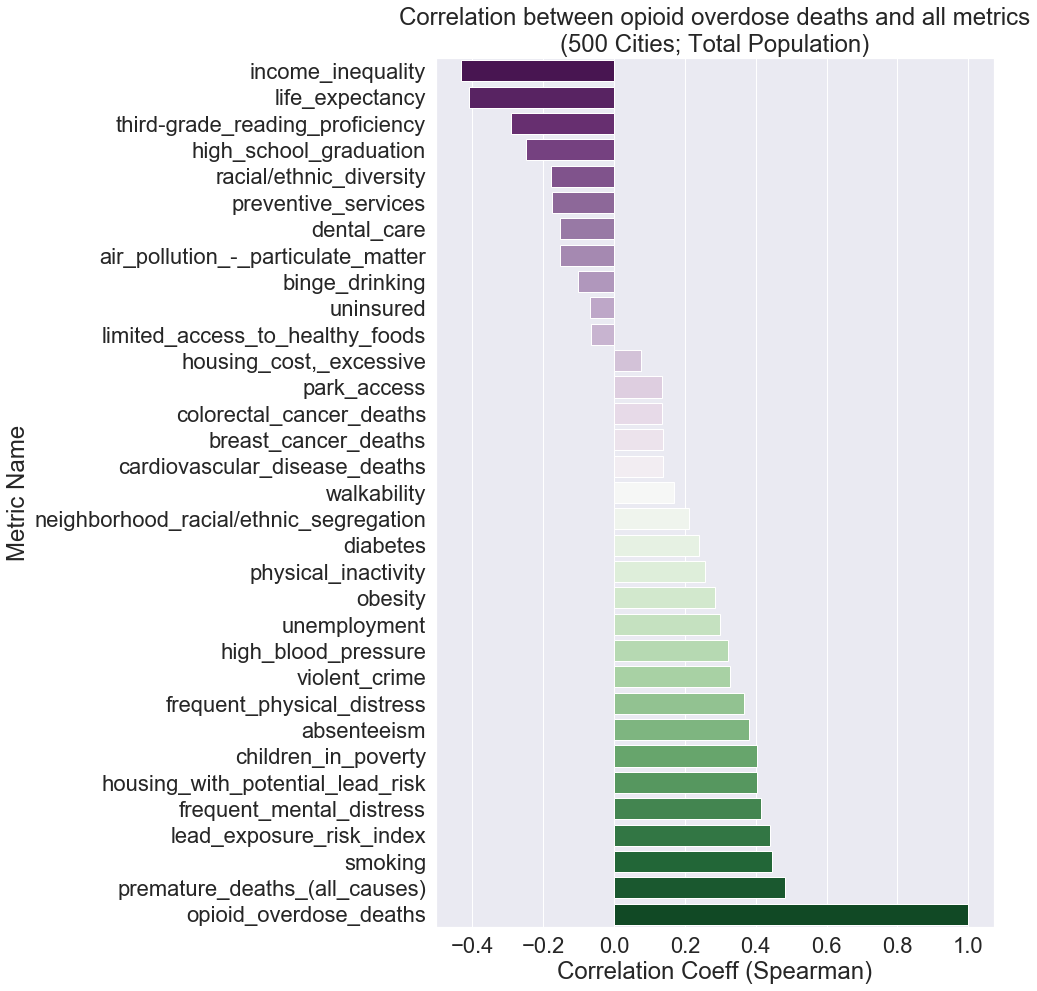

In [31]:
sns.set(font_scale=2)
plt.figure(figsize=(10,16))
sns.barplot(y='metric_name', x='opioid_corr_spear', data=opioid_corr_spear, orient="h", palette="PRGn")
plt.xlabel('Correlation Coeff (Spearman)')
plt.ylabel('Metric Name')
plt.title('Correlation between opioid overdose deaths and all metrics\n(500 Cities; Total Population)')
plt.show()

In [32]:
# select some of the correlated metrics:
city_piv_sub = city_metric_pivot[['opioid_overdose_deaths', 'smoking', 'frequent_mental_distress', 'life_expectancy', 'income_inequality']].copy()
city_piv_sub.dropna().describe()

,opioid_overdose_deaths,smoking,frequent_mental_distress,life_expectancy,income_inequality
count,420.000000,420.000000,420.000000,420.000000,420.000000
mean,14.837143,17.608810,12.899524,78.744762,-6.023571
std,13.353835,4.096601,2.037313,2.285149,17.145394
min,2.000000,8.600000,7.900000,72.000000,-45.900000
25%,6.500000,14.700000,11.500000,77.300000,-18.125000
50%,10.100000,17.300000,13.000000,78.700000,-8.650000
75%,17.250000,20.225000,14.300000,80.400000,5.025000
max,116.200000,29.700000,18.400000,85.100000,44.000000


In [33]:
# one city with a lot of opioid overdose deaths
# which other cities have deaths counts over 50?
city_metric_pivot[['uniq_name', 'opioid_overdose_deaths']][city_metric_pivot['opioid_overdose_deaths'] > 50].sort_values('opioid_overdose_deaths', ascending=False)

,uniq_name,opioid_overdose_deaths
367,OH_Dayton,116.2
498,WV_Charleston,71.4
333,NH_Manchester,68.8
279,MD_Baltimore,66.0
364,OH_Cincinnati,62.8
389,PA_Pittsburgh,61.1
362,OH_Akron,58.9
365,OH_Cleveland,57.9
269,MA_Fall River,57.1
405,TN_Knoxville,54.4


4 MA towns with a lot of high opioid overdose deaths - interesting

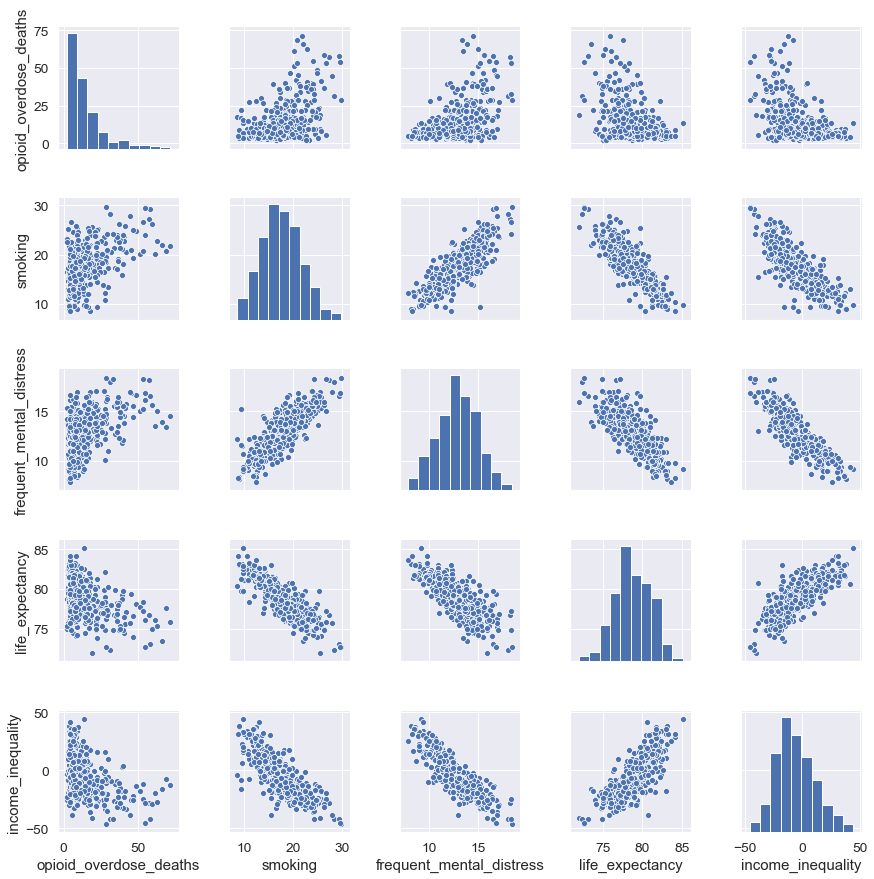

In [34]:
# remove Dayton OH - too high, skews plots
sns.set(font_scale=1.25)
sns.pairplot(city_piv_sub[city_piv_sub['opioid_overdose_deaths'] < 100].dropna())
plt.show()

* The other selected metrics are highly correlated with each other - something to watch out for in general
* opioid overdose deaths highly skewed, has some relationship with these variables
* variables might be a proxy for something else - poverty maybe?